<a href="https://colab.research.google.com/github/teruyuki-yamasaki/HelloBrax/blob/main/jax0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [Learn JAX: From Linear Regression to Neural Networks](https://www.kaggle.com/code/truthr/jax-0)
by [@AllesistKode](https://twitter.com/AllesistKode)


In this Notebook, you will learn how to work with JAX. There are no theory sections here. Here, you will learn stuff as you need it. Just-in-time learning, if you wish! This Notebook will contain three chapters. In these Notebooks, you will learn how to implement and use algorithms in JAX.

Table of Contents

0. A Brief Introduction to JAX
0.1. Autograd
0.2. XLA
0.3. Composable Transforms
0.4. JIT, or Just-In-Time Compilation
0.5. Getting to Programming with JAX
0.6. The grad method -  
∇
 
1. Linear Regression
1.1. A Toy Example of Linear Regression
1.2. Solving a Real World Problem with Linear Regression
2. Logistic Regression with JAX
2.1. Pseudo Random Numbers in JAX
2.2. Implementing Logistic Regression
2.3. Solving a Problem with Logistic Regression
3. Training a Neural Network with JAX
Where to Go From Here
Citations and References
I will briefly go over the theories, and then their implementations in JAX.





## Chapter 0: A Brief Introduction to JAX
According to the documentation of the project,

JAX is Autograd and XLA, brought together for high-performance numerical computing and machine learning research. It provides composable transformations of Python+NumPy programs: differentiate, vectorize, parallelize, Just-In-Time compile to GPU/TPU, and more.


### Section 0.1: What is Autograd?
Here, Autograd is a specific library. In general, autograd refers to automatic differentiation. In each Deep Learning library, it is essential for the library to calculate the gradients of parameters to be able to backpropagate through them for optimization and update of those parameters to make the model do things that we want. The library that it talks about can automatically differentiate native Python and Numpy code. It can also handle a large subset of Python's features, including loops, ifs, recursion and closures.


### Section 0.2: What is XLA?
XLA (Accelerated Linear Algebra) is a compiler that compiles written code to accelerators such as GPU and TPU without any code change. When a code in any library such as PyTorch, TensorFlow, etc. is run where there are many components to it, the computation graph launches as many kernels. This is inefficient, and slow. Instead, XLA compiles all the code to an accelerator, where it is run very fast.
```
def model_fn(x, y, z):
    return tf.reduce_sum(x + y * z)
```
The above function launches three kernels- one each for the addition, the multiplication, and the reduction. (Code from TensorFlow XLA doc).

In JAX, Autograd and XLA are brought together, so that automatic-differentiation and compilation to GPU/TPU happen together to provide a very sophisticated, easy to use experience for Deep Learning research and development.

### Section 0.3: Composable Transformations
JAX is functional by design. Here, you can one transformation on top of the other very easily. It is common to see code like-

```
grad(jit(grad(jit(grad(np.tanh)))))(1.0)
```

Note that, in the code, the (1.0) is outside of the parens that change the function. The function itself is getting changed, and not the output of one function is being switched to the next in the line. This is why it is called "composable transforms"- the functions themselves get composed.

### Section 0.4: JIT, or Just-In-Time Compilation
JAX provides you with capabilities to Just-In-Time compile specific functions that will be compiled and ran during the runtime, and not before runtime. You might worry about the overhead costs of compiling functions, but Deep Learning libraries are the ideal place for JIT-compiled functions as functions are called many times over the course of training. So, it's basically- compiled once, ran many times. We will see JIT in action throughout this Notebook.

In [1]:
import jax 
import jaxlib 
import jax.numpy as jnp 

In [2]:
x = jnp.arange(5) 
print(x) 

[0 1 2 3 4]


In [3]:
x

DeviceArray([0, 1, 2, 3, 4], dtype=int32)

In [4]:
x, type(x)

(DeviceArray([0, 1, 2, 3, 4], dtype=int32), jaxlib.xla_extension.DeviceArray)

### Section 0.6: The `grad` method -  
∇
 
Here we see a JAX function for the first time. As we have seen in Section 0.3, JAX allows you change functions. jax.grad is a function that takes a numerical function written in Python, and then returns a function that computes the gradient of the original function. Yes, the function gets changed. We are dealing with higher order funtions here. This might be weird to many, but to anyone who has calculated differentials by hand, this is really natural.

In PyTorch, the differentiation of a function is always linked to the data. Differentiation does not mean anything until you calculate it at some point. Let's see how differentiation differs in JAX from PyTorch.

In [5]:
import torch 

tensor_a = torch.arange(1, 25., requires_grad=True) 
tensor_a 

tensor([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14.,
        15., 16., 17., 18., 19., 20., 21., 22., 23., 24.], requires_grad=True)

In [6]:
def sum_of_squares_torch(n: torch.Tensor) -> torch.Tensor:
    return torch.sum(torch.pow(n, 2)) 

In [7]:
b = sum_of_squares_torch(tensor_a) 
b

tensor(4900., grad_fn=<SumBackward0>)

In [8]:
b.backward() 
print(tensor_a.grad) 
print(tensor_a) 

tensor([ 2.,  4.,  6.,  8., 10., 12., 14., 16., 18., 20., 22., 24., 26., 28.,
        30., 32., 34., 36., 38., 40., 42., 44., 46., 48.])
tensor([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14.,
        15., 16., 17., 18., 19., 20., 21., 22., 23., 24.], requires_grad=True)


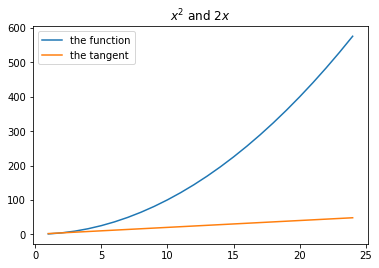

In [9]:
import matplotlib.pyplot as plt 

xs = tensor_a.detach().numpy() 
ys = xs ** 2 
y_dash = 2 * xs

plt.plot(xs, ys, label='the function') 
plt.plot(xs, y_dash, label='the tangent') 
plt.legend() 
plt.title('$x^2$ and $2x$')
plt.show() 

In [10]:
def sum_of_squares_jax(x: jaxlib.xla_extension.DeviceArray) -> jaxlib.xla_extension.DeviceArray:
    return jnp.sum(x ** 2) 

In [11]:
tensor_a = jnp.arange(1, 25.) 
tensor_a

DeviceArray([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
             13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24.],            dtype=float32)

In [12]:
sum_of_squares_jax(tensor_a) 

DeviceArray(4900., dtype=float32)

In [13]:
sum_of_squares_dx = jax.grad(sum_of_squares_jax) 

In [14]:
sum_of_squares_dx(tensor_a) 

DeviceArray([ 2.,  4.,  6.,  8., 10., 12., 14., 16., 18., 20., 22., 24.,
             26., 28., 30., 32., 34., 36., 38., 40., 42., 44., 46., 48.],            dtype=float32)

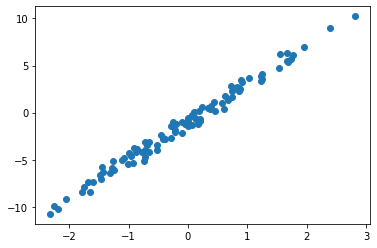

In [15]:
import numpy as np 

xs = np.random.normal(size=(100,)) 
noise = np.random.normal(scale=0.5, size=(100,)) 
ys = 4 * xs - 1 + noise 

plt.scatter(xs, ys) 
plt.show() 

In [16]:
def model(theta: jaxlib.xla_extension.DeviceArray, x: np.ndarray) -> jaxlib.xla_extension.DeviceArray:
    w, b = theta 
    return w * x + b

def loss_fn(theta: jaxlib.xla_extension.DeviceArray, 
            x: np.ndarray, y: np.ndarray) -> jaxlib.xla_extension.DeviceArray:
    pred = model(theta, x)
    return jnp.mean((pred - y)**2) 

def update(theta: jaxlib.xla_extension.DeviceArray, 
           x: np.ndarray, y: np.ndarray, lr: float=0.1) -> jaxlib.xla_extension.DeviceArray:
           return theta - lr * jax.grad(loss_fn)(theta, x, y) 

w = 4.01, b = -0.96


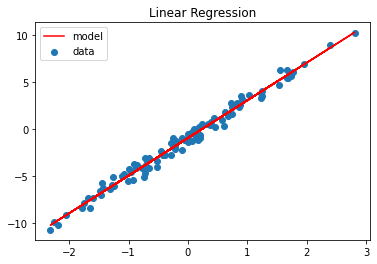

In [17]:
theta = jnp.array([1.,1]) 

for _ in range(1000):
    theta = update(theta, xs, ys) 

w, b = theta 
print(f'w = {w:<.2f}, b = {b:<.2f}')
plt.scatter(xs, ys, label='data') 
plt.plot(xs, model(theta, xs), 'r', label='model')
plt.legend() 
plt.title('Linear Regression') 
plt.show()  

[Weather Conditions in World War Two](https://www.kaggle.com/datasets/smid80/weatherww2)

In [18]:
from google.colab import drive 
drive.mount('/content/gdrive') 
%cd /content/gdrive/MyDrive/Colab Notebooks/brax/
%ls

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/MyDrive/Colab Notebooks/brax
BraxEnv.ipynb      inputs/     JAX.ipynb
HelloBrax01.ipynb  jax0.ipynb  TrainInBrax.ipynb


In [19]:
import pandas as pd 

weather_data_org = pd.read_csv('./inputs/WeatherConditions/Summary of Weather.csv')
weather_data_minmax = weather_data_org[['MaxTemp', 'MinTemp']].reset_index() 
weather_data_minmax.sample(5) 

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (7,8,18,25) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,index,MaxTemp,MinTemp
113134,113134,31.666667,21.666667
69200,69200,30.000000,13.333333
5239,5239,30.000000,20.000000
49914,49914,29.444444,25.000000
43908,43908,11.666667,8.333333


In [20]:
from sklearn.model_selection import train_test_split 

data = weather_data_minmax 
seed = 42 

X = jnp.array(data['MinTemp'].to_numpy(dtype=float)) 
Y = jnp.array(data['MaxTemp'].to_numpy(dtype=float)) 

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=seed) 

In [21]:
@jax.jit 
def model(theta: jaxlib.xla_extension.DeviceArray, x: jaxlib.xla_extension.DeviceArray) -> jaxlib.xla_extension.DeviceArray:
    w, b = theta 
    return x * w + b 

@jax.jit 
def loss_fn(theta:jaxlib.xla_extension.DeviceArray, x:jaxlib.xla_extension.DeviceArray, y:jaxlib.xla_extension.DeviceArray) -> jaxlib.xla_extension.DeviceArray:
    pred = model(theta, x) 
    return jnp.mean((pred - y)**2) 

@jax.jit 
def update(theta:jaxlib.xla_extension.DeviceArray, x:jaxlib.xla_extension.DeviceArray, y:jaxlib.xla_extension.DeviceArray, lr: float=0.1) -> jaxlib.xla_extension.DeviceArray:
    return theta - lr * jax.grad(loss_fn)(theta, x, y) 

X:  (119040,)
Y:  (119040,)
x_train:  (95232,)
y_train:  (95232,)
w = 1.23, b = 3.94


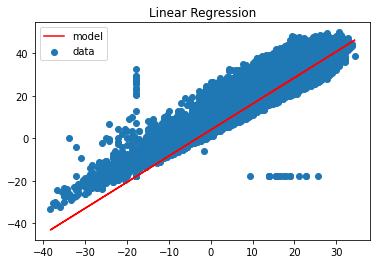

In [22]:
theta = jnp.array([1.,1]) 

print('X: ', X.shape)
print('Y: ', Y.shape)
print('x_train: ', x_train.shape) 
print('y_train: ', y_train.shape) 

for _ in range(1000):
    theta = update(theta, x_train, y_train, lr=0.001)

w, b = theta 
print(f'w = {w:<.2f}, b = {b:<.2f}')
plt.scatter(x_train, y_train, label='data') 
plt.plot(x_train, model(theta, x_train), 'r', label='model')
plt.legend() 
plt.title('Linear Regression') 
plt.show()  

In [23]:
from sklearn.metrics import mean_squared_error as MSE 

print(MSE(np.array(y_test), np.array(model(theta, x_test)), squared=False))

5.0338135


generation of pseudo random numbers

JAX cannot provide sequential guarantee

In [24]:
from jax import random 

key = random.PRNGKey(84) 
key

DeviceArray([ 0, 84], dtype=uint32)

In [25]:
print(random.uniform(key))
print(random.uniform(key))

0.4272107
0.4272107


In [26]:
print(random.uniform(key,shape=(1,3)))
print(random.uniform(key,shape=(1,3)))

[[0.5701088  0.05684721 0.7848358 ]]
[[0.5701088  0.05684721 0.7848358 ]]


In [27]:
_ = random.split(key) 
_

DeviceArray([[2448598795, 3780041349],
             [3370844222, 3811792685]], dtype=uint32)

In [28]:
new_key, sub_key = random.split(key) 
del key 

print(new_key) 
print(sub_key) 
print(random.normal(new_key))
print(random.normal(sub_key))
#print(key) # NameError: name 'key' is not defined

[2448598795 3780041349]
[3370844222 3811792685]
-1.3415899
-0.24351525


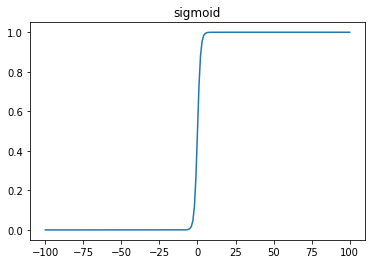

In [29]:
@jax.jit 
def sigmoid(x: jaxlib.xla_extension.DeviceArray) -> jaxlib.xla_extension.DeviceArray:
    return 1 / (1 + jnp.exp(-x)) 

xs = jnp.arange(-100, 101) 
plt.plot(xs, sigmoid(xs)) 
plt.title('sigmoid') 
plt.show() 

## Logistic Regression

$$
y = f(x) = \frac{e^x}{1 + e^x} = \frac{1}{1 + e^{-x}}
$$

$$
J = \mathbb{E}[Cost(f(x),y)]
$$

$$
Cost(f(x),y) = \left\{ 
\begin{array}
- \log f(x) & \mbox{if } y = 1, \\
- \log(1 - f(x)) & \mbox{if } y = 0 \\ 
\end{array}
\right.
$$

$$
Cost(f(x), y) = - y \log f(x) - (1 - y) \log (1 - f(x))
$$

In [71]:
seed = 42 
key = random.PRNGKey(seed) 

_ = random.split(key, 3) 
_

DeviceArray([[3134548294, 3733159049],
             [3746501087,  894150801],
             [ 801545058, 2363201431]], dtype=uint32)

In [72]:
key, W_key, b_key = random.split(key, 3) 

In [79]:
@jax.jit 
def init_parameters(x: jaxlib.xla_extension.DeviceArray) -> (jaxlib.xla_extension.DeviceArray, jaxlib.xla_extension.DeviceArray):
    #Number of features == number of weights
    #Uses scaling while initialization (see: https://arxiv.org/abs/1502.01852v1)
    n_features = x.shape[-1] 

    W = random.normal(key=W_key, shape=(n_features,))*(np.sqrt(2/x.shape[0]))
    b = random.normal(key=b_key, shape=())*(np.sqrt(2/x.shape[0]))

    return W, b 

@jax.jit 
def lr_model(x:jaxlib.xla_extension.DeviceArray, W:jaxlib.xla_extension.DeviceArray, b:jaxlib.xla_extension.DeviceArray) -> jaxlib.xla_extension.DeviceArray:
    return jax.nn.sigmoid(jnp.dot(x, W)+ b) 

epsilon = 1e-6 
@jax.jit 
def nll_loss(W:jaxlib.xla_extension.DeviceArray, b:jaxlib.xla_extension.DeviceArray, x:jaxlib.xla_extension.DeviceArray, y:jaxlib.xla_extension.DeviceArray) -> jaxlib.xla_extension.DeviceArray:
    pred = lr_model(x, W, b) 
    cost = jnp.log(pred + epsilon) * y + jnp.log(1- pred + epsilon) * (1- y) 
    return -jnp.mean(cost)

@jax.jit
def update(W:jaxlib.xla_extension.DeviceArray, b:jaxlib.xla_extension.DeviceArray, x: jaxlib.xla_extension.DeviceArray, y: jaxlib.xla_extension.DeviceArray, lr: float=0.001) -> jaxlib.xla_extension.DeviceArray:
    W_grad, b_grad = jax.grad(nll_loss, (0,1))(W, b, x, y) 
    W -= lr * W_grad 
    b -= lr * b_grad 
    return W, b 

#W, b = init_parameters(X)

In [74]:
import pandas as pd 
%ls inputs/
candy_power_data = pd.read_csv('./inputs/Candy/candy-data.csv').drop(['competitorname'], axis=1) 
candy_power_data.sample(5)

Candy/  WeatherConditions/


,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
52,1,0,0,1,0,0,0,0,0,0.720,0.651,84.180290
32,1,0,0,1,0,0,0,0,1,0.825,0.651,71.465050
73,0,1,0,0,0,0,0,0,1,0.604,0.755,54.861111
21,0,1,0,0,0,0,0,0,1,0.465,0.465,42.178772
36,1,0,1,0,1,0,0,1,0,0.604,0.651,73.099556


In [75]:
X = jnp.asarray(np.array(candy_power_data.drop(['chocolate'], axis=1)), dtype='float32')
y = jnp.asarray(np.array(candy_power_data[['chocolate']]), dtype='bool').flatten() 
X.shape, y.shape

((85, 11), (85,))

In [76]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42) 

In [80]:
from tqdm.notebook import tqdm 

W, b = init_parameters(X_train) 
#print(update(W, b, X_train, y_train))

for _ in tqdm(range(2_000), desc='Traininig...'):
    W, b = update(W, b, X_train, y_train, lr=0.001) 

Traininig...:   0%|          | 0/2000 [00:00<?, ?it/s]

In [81]:
from sklearn.metrics import accuracy_score 

def lr_model_predictor(x: jaxlib.xla_extension.DeviceArray, W: jaxlib.xla_extension.DeviceArray=W, b: jaxlib.xla_extension.DeviceArray=b) -> bool:
    pred = lr_model(x, W, b) 
    if pred > 0.5:
        return True 
    return False 

preds = [] 

for i in range(len(X_test)):
    preds.append(lr_model_predictor(X_test[i]))

accuracy_score(preds, y_test) 

0.9090909090909091

## Neural Networks

### PyTrees


In [82]:
foo = [1, (2, 3), {'a': 4, 'b': 5, 'c': [3.14, (2.17, 6.28), [70, 80, 90]]}, [10, 20, 30, {'bar': 23}]] 
foo

[1,
 (2, 3),
 {'a': 4, 'b': 5, 'c': [3.14, (2.17, 6.28), [70, 80, 90]]},
 [10, 20, 30, {'bar': 23}]]

In [83]:
import jax 

jax.tree_leaves(foo)

[1, 2, 3, 4, 5, 3.14, 2.17, 6.28, 70, 80, 90, 10, 20, 30, 23]

In [84]:
jax.tree_map(lambda x: x**3, foo)

[1,
 (8, 27),
 {'a': 64,
  'b': 125,
  'c': [30.959144000000002,
   (10.218312999999998, 247.67315200000002),
   [343000, 512000, 729000]]},
 [1000, 8000, 27000, {'bar': 12167}]]

See, how JAX easily operated on the leaf nodes, keeping the original structure of our pytree intact

In [95]:
import numpy as np
import jax.numpy as jnp 
from typing import List, Dict 

def init_mlp_params(layer_widths: List) -> List[Dict]:
    params = [] 
    for n_in, n_out in zip(layer_widths[:-1], layer_widths[1:]):
        params.append(dict(
            weights=np.random.normal(size=(n_in, n_out))*np.sqrt(2/n_in), 
            biases=np.ones(shape=(n_out,))
            )
        )
    return params 

In [106]:
params = init_mlp_params([1, 128, 128, 64, 64, 1]) 
jax.tree_map(lambda x: x.shape, params) 

[{'biases': (128,), 'weights': (1, 128)},
 {'biases': (128,), 'weights': (128, 128)},
 {'biases': (64,), 'weights': (128, 64)},
 {'biases': (64,), 'weights': (64, 64)},
 {'biases': (1,), 'weights': (64, 1)}]

In [107]:
*hidden, last = params
hidden

[{'biases': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1.]),
  'weights': array([[ 2.25863194e+00, -4.54558554e-01,  1.32739333e+00,
          -7.29156018e-01,  3.55117267e+00,  5.03410410e+00,
          -3.76055707e-01,  1.06885380e+00,  1.10549277e+00,
           1.90541677e+00,  2.79150920e-03, -9.71902985e-01,
          -2.70897483e+00, -3.19844379e-01,  6.55857790e-01,
           1.17215154e+00, -8.07784797e-01,  1.79022598e+00,
          -2.32836693e-01, 

In [108]:
last

{'biases': array([1.]), 'weights': array([[ 0.06178727],
        [ 0.30979265],
        [-0.15162702],
        [ 0.08182167],
        [-0.10239129],
        [ 0.26765036],
        [ 0.0597202 ],
        [-0.24467291],
        [ 0.03285603],
        [-0.17302812],
        [-0.15397801],
        [ 0.06498188],
        [-0.06937387],
        [ 0.03144477],
        [-0.10651653],
        [ 0.282702  ],
        [-0.16320706],
        [-0.12114941],
        [ 0.08486167],
        [ 0.02251873],
        [-0.07716622],
        [-0.02855237],
        [ 0.00533469],
        [ 0.13597024],
        [ 0.34264675],
        [-0.0837358 ],
        [-0.03883733],
        [-0.32521678],
        [ 0.26636622],
        [ 0.13182335],
        [ 0.20996659],
        [ 0.16324565],
        [-0.14098715],
        [-0.22325694],
        [ 0.28130395],
        [-0.15285365],
        [-0.05401144],
        [ 0.16919607],
        [-0.08435965],
        [-0.10038505],
        [ 0.01035806],
        [ 0.1732856 ],


In [121]:
@jax.jit 
def forward(params: list, x: jaxlib.xla_extension.DeviceArray) -> jaxlib.xla_extension.DeviceArray:
    *hidden, last = params 
    for layer in hidden:
        x = jax.nn.relu(x @ layer['weights'] + layer['biases']) 
    return x @ last['weights'] + last['biases']

@jax.jit 
def loss_fn(params:list, x: jaxlib.xla_extension.DeviceArray, y: jaxlib.xla_extension.DeviceArray) -> jaxlib.xla_extension.DeviceArray:
    pred = forward(params, x)
    return jnp.mean((pred - y)**2) 

@jax.jit 
def update(params: list, x: jaxlib.xla_extension.DeviceArray, y: jaxlib.xla_extension.DeviceArray, lr: float=0.0001) -> list:
    grads = jax.grad(loss_fn)(params, x, y) 
    return jax.tree_multimap(lambda p, g: p - lr * g, params, grads) 

In [122]:
xs = np.random.normal(size=(1000, 1))
ys = 0.5 * (xs + 1) ** 3

params = init_mlp_params([1, 128, 64, 64, 1]) 
grads = jax.grad(loss_fn)(params, xs, ys) 
jax.tree_map(lambda x: x.shape, grads) 

[{'biases': (128,), 'weights': (1, 128)},
 {'biases': (64,), 'weights': (128, 64)},
 {'biases': (64,), 'weights': (64, 64)},
 {'biases': (1,), 'weights': (64, 1)}]

training...:   0%|          | 0/1000 [00:00<?, ?it/s]

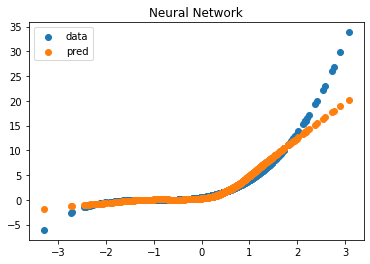

In [123]:
import matplotlib.pyplot as plt 
from tqdm.notebook import tqdm 

xs = np.random.normal(size=(1000, 1))
ys = 0.5 * (xs + 1) ** 3

layer_widths = [1, 128, 128, 64, 64, 1]
params = init_mlp_params(layer_widths)

for _ in tqdm(range(1000), desc='training...'):
    params = update(params, xs, ys) 

plt.scatter(xs, ys, label='data') 
plt.scatter(xs, forward(params, xs), label='pred') 
plt.legend() 
plt.title('Neural Network') 
plt.show() 